<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
Добрый день, Александр. Спасибо тебе за ревью проекта. Постарался исправить по всем указанным тобой пунктам. 
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Сергей, рад тебя видеть!) Спасибо большое за обратную связь и правки

Проект "Стримчик"    
===
                                                                                        
В данном проекте представлен анализ данных интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры.


**Цель проекта** - выявить определяющие успешность игр закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В датасете содержатся исторические данные о продажах игр в различных регионах, оценки пользователей и экспертов, жанры и игровые платформы (например, Xbox или PlayStation).


**Описание данных**:

`Name` — название игры

`Platform` — платформа

`Year_of_Release` — год выпуска

`Genre` — жанр игры

`NA_sales` — продажи в Северной Америке (миллионы проданных копий)

`EU_sales` — продажи в Европе (миллионы проданных копий)

`JP_sales` — продажи в Японии (миллионы проданных копий)

`Other_sales` — продажи в других странах (миллионы проданных копий)

`Critic_Score` — оценка критиков (максимум 100)

`User_Score` — оценка пользователей (максимум 10)

`Rating` — рейтинг от организации ESRB

**План исследования:**

- предобработка данных
- исследовательский анализ данных
- исследование портрета пользователя каждого региона
- проверка гипотез
- выводы

## Загрузка

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
import numpy as np
from scipy import stats as st
from plotly.subplots import make_subplots

In [185]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [186]:
import missingno as msno

In [187]:
import warnings
warnings.filterwarnings('ignore')

In [188]:
df = pd.read_csv('/Users/sergey/Downloads/games.csv')

In [189]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Проведена загрузка необходимых билиотек.

Загружен датасет. Датасет имеет 11 колонок и 16715 строк. Колонки имеют заголовки в верхнем регистре.

## Предобработка данных

In [190]:
df.columns = df.columns.str.lower()

Названия столбцов приведены к нижнему регистру 

In [191]:
df.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [193]:
df.shape

(16715, 11)

Датасет имеет 11 колонок и 16715 строк

In [194]:
df['year_of_release'].min()

1980.0

In [195]:
df['year_of_release'].max()

2016.0

Данные охватывают период с 1980 по 2016 год

In [196]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Выявление дубликатов

In [198]:
df.duplicated().sum()

0

Явных дубликатов не выявлено

In [199]:
df['platform'].value_counts()

platform
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

In [200]:
df['genre'].value_counts()

genre
Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: count, dtype: int64

In [201]:
df['rating'].value_counts()

rating
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: count, dtype: int64

В категориальных переменных дубликатов так же не выявлено

**Проверка на неявные дубликаты**

In [202]:
df.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

2

### Пропуски

In [203]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Выявлены пропуски в следующих столбцах: `name` 2, `year_of_release` 269, `genre`2, `critic_score` 8578, `user_score` 6701, `rating` 6766 пропуска

<Axes: >

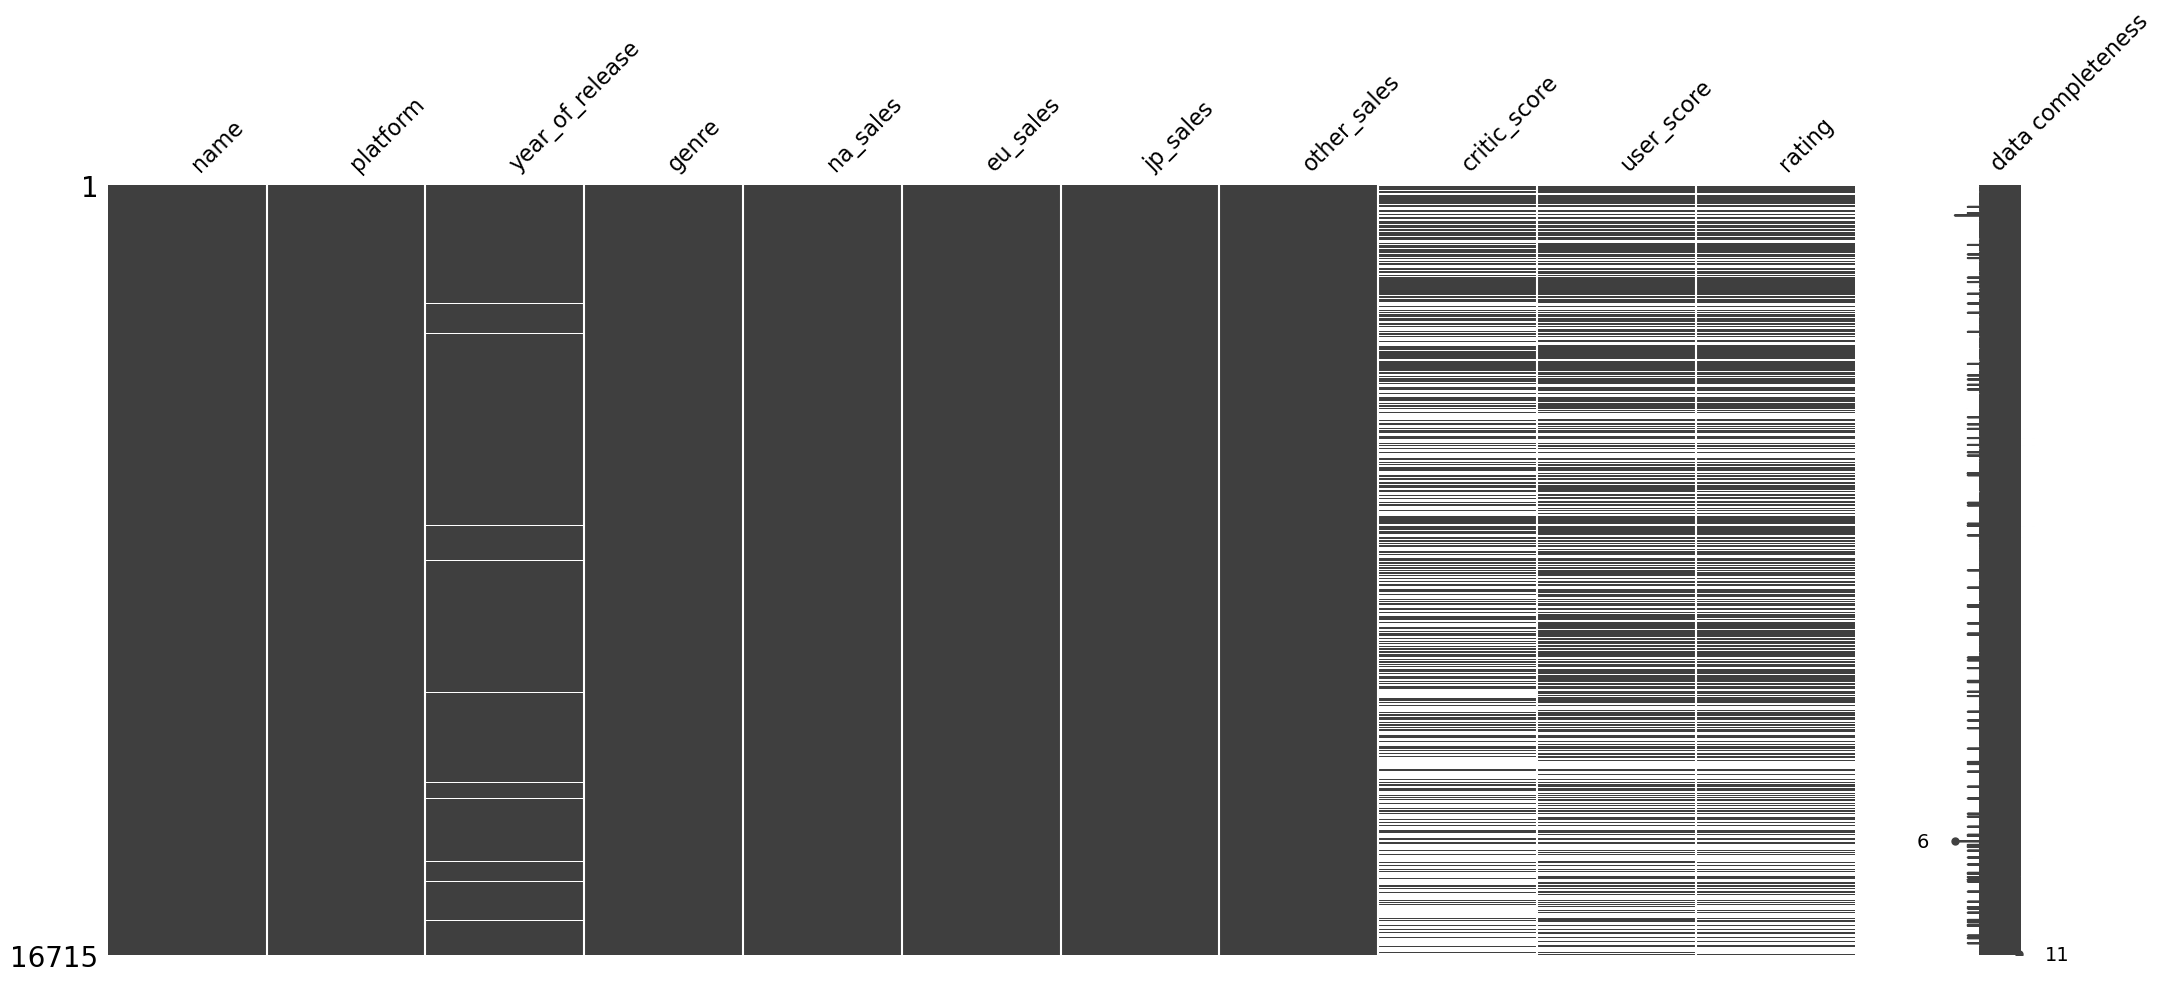

In [204]:
msno.matrix(df, labels=True)

Выше визуализированы пропуски в данных

In [205]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Две строки с пропусками названий игр и жанров удалим

In [206]:
df = df.dropna(subset=['name', 'genre'])

In [207]:
df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2231,Inazuma Eleven 3,DS,2010.0,Role-Playing,0.00,0.00,0.93,0.00,NaN,NaN,NaN
16687,Neo Angelique Special,PSP,2008.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
7235,Tamagotchi no KiraKira Omisecchi,DS,2008.0,Misc,0.00,0.00,0.22,0.00,NaN,NaN,NaN
9614,SkullMonkeys,PS,1998.0,Platform,0.07,0.05,0.00,0.01,NaN,NaN,NaN
13533,Tropico 3,PC,2009.0,Strategy,0.00,0.04,0.00,0.01,79.0,8.1,T


In [208]:
df['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Строки с пропусками в столбцах`year_of_release`, `critic_score`, `user_score`, `rating` удалять нельзя, так как это будет большой потерей данных. А оставшие значения в других столбцах ещё подлежат анализу.

Заполнение пропусков в столбцах `year_of_release`, `critic_score`, `user_score`, `rating` невозможно, так как данные весьма специфичны, не зависят от других значениях в столбцах, поэтому заполнению численным (средним, медианой и т.д.) значением не подлежат. Чтобы избежать искажений, ошибочных статистических выводоы и неправильных интерпретаций оставим пропущенные значения в данных.

In [209]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'],format='%Y', errors = 'ignore')

In [210]:
df['year'] = pd.DatetimeIndex(df['year_of_release']).year

In [211]:
df['year'] = df['year'].astype('int', errors='ignore')

Столбец с годом выпуска переведен в формат `datetime`. 

Создан отдельный столбец `year` с годом

In [212]:
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
year                269
dtype: int64

In [213]:
df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
2577,The Sims 2: Pets,PSP,2006-01-01,Simulation,0.19,0.38,0.00,0.22,57.0,7.3,T,2006.0
14827,Putty Squad,PSV,2013-01-01,Platform,0.01,0.01,0.00,0.01,NaN,8.2,E10+,2013.0
15202,Thomas and Friends: Steaming around Sodor,3DS,2015-01-01,Action,0.00,0.02,0.00,0.00,NaN,tbd,NaN,2015.0
5184,My Horse & Me,DS,2007-01-01,Sports,0.33,0.00,0.00,0.03,NaN,NaN,NaN,2007.0
1620,Assassin's Creed: Bloodlines,PSP,2009-01-01,Action,0.43,0.47,0.05,0.28,63.0,7.2,M,2009.0


In [214]:
len(df[df['user_score']== "tbd"])

2424

В датафрейме 2424 строки, в которых в столбце `user_score` стоит значение **tbd**

Аббревиатура **tbd** (to be determined) означает, что значение ещё не определено или не установлено.
В данном случае, можно предположить, что оценка пользователей ещё не была определена или не была введена в систему. Возможно, данные ещё не были собраны или обработаны.
Для дальнейшего анализа заменим данное значение значением-заглушкой - NaN.

In [215]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

In [216]:
len(df[df['user_score']== "tbd"])

0

In [217]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df['total_sales'] = round(df['total_sales'], 3)

In [218]:
df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,total_sales
4202,Godzilla: Save the Earth,PS2,2004-01-01,Fighting,0.23,0.18,0.00,0.06,62.0,8.7,T,2004.0,0.47
15722,Mary King's Riding School,DS,2008-01-01,Simulation,0.00,0.02,0.00,0.00,NaN,NaN,NaN,2008.0,0.02
15044,Spy Hunter: Nowhere To Run,PS2,2006-01-01,Racing,0.01,0.01,0.00,0.00,51.0,6,T,2006.0,0.02
9843,Burning Road,PS,1996-01-01,Racing,0.07,0.05,0.00,0.01,NaN,NaN,NaN,1996.0,0.13
8459,Parodius,SAT,1995-01-01,Shooter,0.00,0.00,0.16,0.00,NaN,NaN,NaN,1995.0,0.16


Создан отдельный столбец `total_sales` с суммарной продажей каждой игры

**Заключение по разделу:**
Датасет имеет 11 колонок и 16715 строк и охватывает период с 1980 по 2016 год. Названия столбцов приведены к нижнему регистру. В категориальных и количественных переменных дубикатов не выявлено. Несколько строк с пропусками названий игр и жанров удалены. Выявлены так же пропуски в столбцах: `name`, `year_of_release`, `genre`, `critic_score`, `user_score`, `rating`. Пропуски заполнению численным (средним, медианой и т.д.) значением не подлежат, поэтому оставили пропущенные значения. Столбец с годом выпуска переведен в формат `datetime`. Создан отдельный столбец `year` с годом и столбец `total_sales` с суммарной продажей каждой игры

## Исследовательский анализ данных

### Динамика выпуска игр по годам

In [219]:
pivot_1 = df.pivot_table(index='year', values='name', aggfunc=['count']).reset_index()
pivot_1.columns = ['year', 'game_count']

In [220]:
pivot_1.tail(10).style.background_gradient('coolwarm').format('{:,.0f}')

,year,game_count
27,"2,007","1,197"
28,"2,008","1,427"
29,"2,009","1,426"
30,"2,010","1,255"
31,"2,011","1,136"
32,"2,012",653
33,"2,013",544
34,"2,014",581
35,"2,015",606
36,"2,016",502


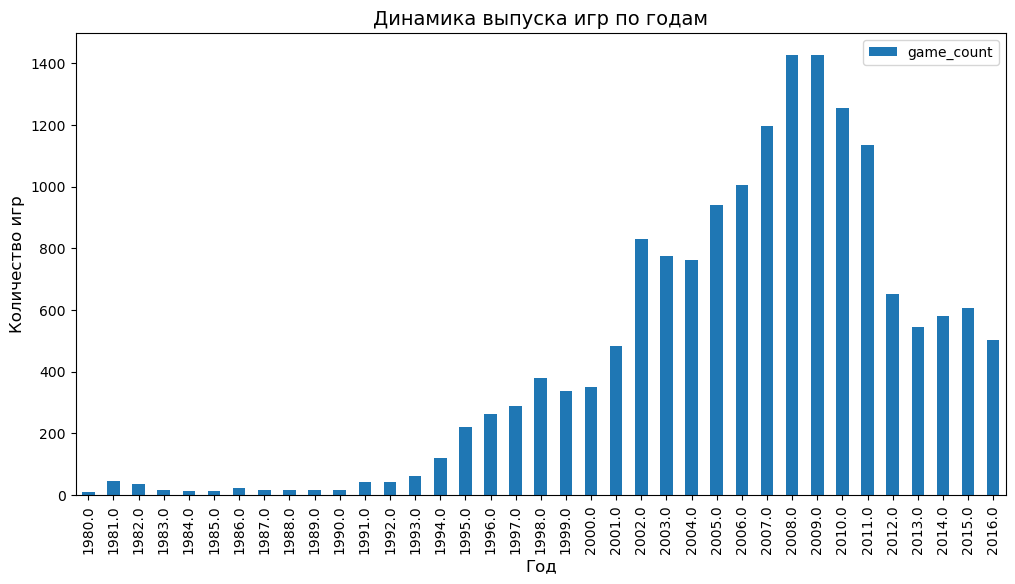

In [221]:
pivot_1.plot(kind='bar', x='year', y='game_count', grid=False, figsize=(12, 6))
plt.title('Динамика выпуска игр по годам', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Количество игр', fontsize=12);

На графике выше визуализирована динамика выпуска игр по годам. Отмечается резкий рост выпуска новых игр с 2002 года с ежегодным росто до 2008 года, где был максимум (1426 игр). Затем отмечается уменьшение до 606 игр в 2015 и 502 игр в 2016 годах

### Динамика продаж игр по платформам

In [222]:
pivot_2 = df.pivot_table(index='platform', values='total_sales', aggfunc=['sum']).reset_index()
pivot_2.columns = ['platform', 'total_sales']

In [223]:
pivot_2.sort_values(by='total_sales', ascending=False).head(10)

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


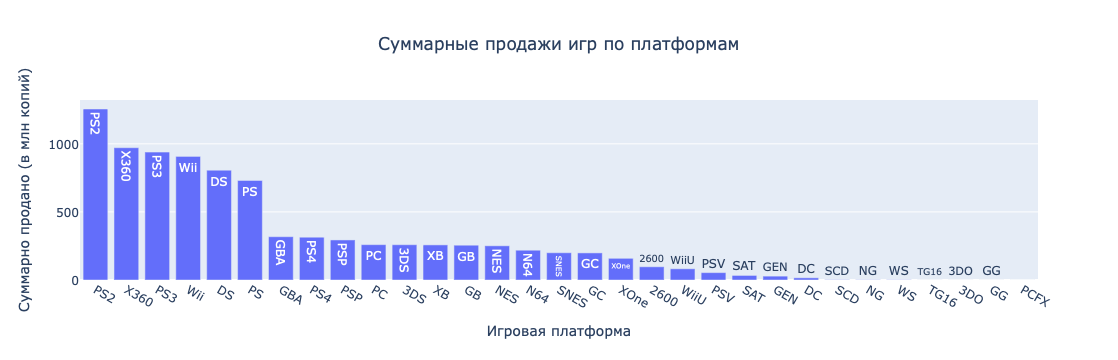

In [224]:
fig = px.bar(pivot_2.sort_values(by='total_sales', ascending=False),
             x='platform',
             y='total_sales',
             text='platform', 
             title='Суммарные продажи игр по платформам')
fig.update_layout(title=dict(x=.5, xanchor="center"),
                   xaxis_title='Игровая платформа',
                   yaxis_title='Суммарно продано (в млн копий)')
fig.show()

На график выше представлены суммарные продажи в миллионах копий по каждой игровой платформе.

Отмечается **6** платформ с наибольшими суммарными продажами: `PS2` (1255.77), `X360` (971.42), `PS3` (939.65), `Wii` (907.51), `DS` (806.12), `PS` (730.86)

Выведем продажи игр этих платформ по годам

In [225]:
top_platform = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [226]:
pivot_3 = df[['platform', 'year', 'total_sales']].query('platform == @top_platform')
pivot_3

,platform,year,total_sales
0,Wii,2006.0,82.54
2,Wii,2008.0,35.52
3,Wii,2009.0,32.77
6,DS,2006.0,29.80
7,Wii,2006.0,28.91
...,...,...,...
16700,DS,2009.0,0.01
16704,DS,2008.0,0.01
16709,PS2,2008.0,0.00
16710,PS3,2016.0,0.01


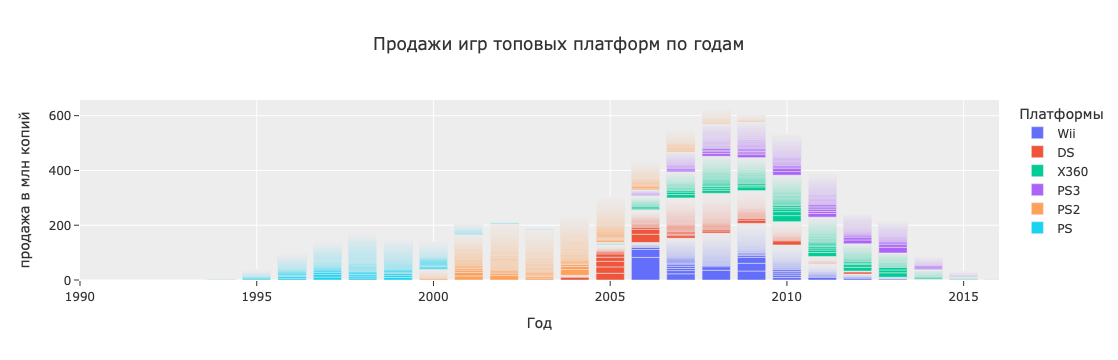

In [227]:
fig = px.bar(pivot_3, x='year', y='total_sales', color='platform', title='Продажи игр топовых платформ по годам')
fig.update_layout(template='ggplot2',
                  title=dict(x=.5, xanchor="center"),
                  xaxis_title='Год',
                  yaxis_title='продажа в млн копий',
                  legend_title='Платформы'
                 )
fig.update_xaxes(range = [1990, 2016])
fig.show()

Выше выведен интерактивный график распределения по годам продаж игр по топовым игровым платформам. 

Отмечается закономерность, что каждые 7 лет появляется новая платформа и исчезает старая

### Данные за актуальный период

Актуальным периодом, который поможет построить прогноз на 2017 год, являются  2014-2016 года.

In [228]:
df2 = df.query('year == (2014, 2015, 2016)')

In [229]:
df2.reset_index(drop=True, inplace=True)

In [230]:
df2.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,total_sales
0,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,2015.0,14.63
1,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,2014.0,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014-01-01,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,2014.0,11.68


In [231]:
df2.shape

(1689, 13)

Актуализировали данные для дальнейшего анализа. Всего 1689 строк

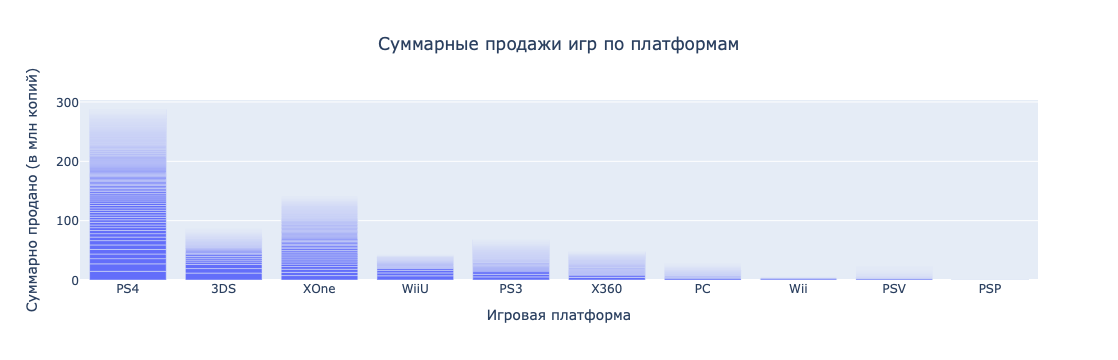

In [232]:
fig = px.bar(df2.sort_values(by='total_sales', ascending=False),
             x='platform',
             y='total_sales', 
             title='Суммарные продажи игр по платформам')
fig.update_layout(title=dict(x=.5, xanchor="center"),
                   xaxis_title='Игровая платформа',
                   yaxis_title='Суммарно продано (в млн копий)')
fig.show()

In [233]:
pivot_4 = df2.pivot_table(index='platform', values='total_sales', columns='year', aggfunc=['sum']).reset_index()
pivot_4.columns = ['platform', '2014', '2015', '2016']
pivot_4['2014'] = round(pivot_4['2014'], 2)
pivot_4['2015'] = round(pivot_4['2015'], 2)
pivot_4['2016'] = round(pivot_4['2016'], 2)
pivot_4 = pivot_4.dropna()
pivot_4 = pivot_4.sort_values(['2014'], ascending=False).reset_index(drop= True)

In [234]:
pivot_4['percent_2014'] = round((pivot_4['2014'] / sum(pivot_4['2014']))*100, 2)
pivot_4['percent_2015'] = round((pivot_4['2015'] / sum(pivot_4['2015']))*100, 2)
pivot_4['percent_2016'] = round((pivot_4['2016'] / sum(pivot_4['2016']))*100, 2)

In [235]:
pivot_4

,platform,2014,2015,2016,percent_2014,percent_2015,percent_2016
0,PS4,100.00,118.90,69.25,30.19,44.39,53.29
1,XOne,54.07,60.14,26.15,16.32,22.45,20.12
2,PS3,47.76,16.82,3.60,14.42,6.28,2.77
3,3DS,43.76,27.78,15.14,13.21,10.37,11.65
4,X360,34.74,11.96,1.52,10.49,4.47,1.17
5,WiiU,22.03,16.35,4.60,6.65,6.10,3.54
6,PC,13.28,8.52,5.25,4.01,3.18,4.04
7,PSV,11.90,6.25,4.25,3.59,2.33,3.27
8,Wii,3.75,1.14,0.18,1.13,0.43,0.14


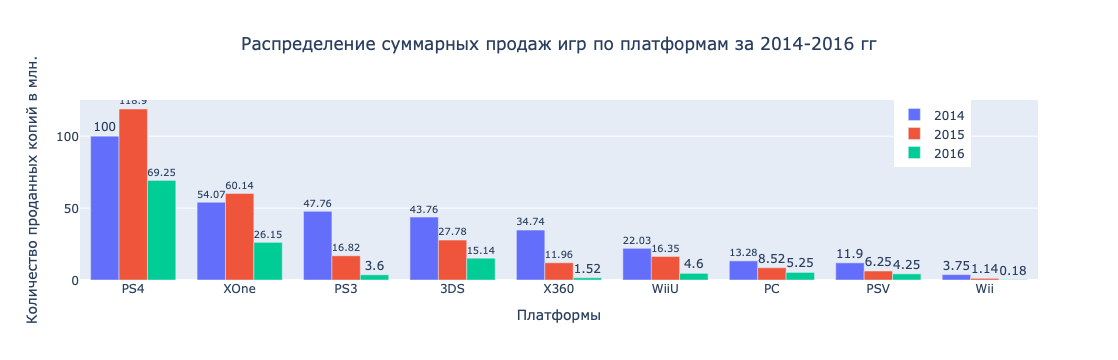

In [236]:

labels = pivot_4['platform']

values = pivot_4['2014']
values1 = pivot_4['2015']
values2 = pivot_4['2016']

fig = go.Figure()
fig.add_trace(go.Bar(x = labels, y = values, name='2014', text=values, textposition='outside'))
fig.add_trace(go.Bar(x = labels, y = values1, name='2015', text=values1, textposition='outside'))
fig.add_trace(go.Bar(x = labels, y = values2, name='2016', text=values2, textposition='outside'))
fig.update_layout(title="Распределение cуммарных продаж игр по платформам за 2014-2016 гг",
                  title_x = 0.5,
                  xaxis_title="Платформы",
                  yaxis_title="Количество проданных копий в млн.",
                  legend=dict(x=.85)
                  )
fig.show()

На графике выше выведено распределение продажи игр по платформам за актуальный для исследования период. 
В топе платформ отмечается `PS4`, `XOne`, `3DS`. По сравнению с 2014 годом в 2015 году отмечаетя увеличение продаж игра на платформах `PS4` и `XOne`, но в 2016 отмечается снижение продаж в абсолютных числах по каждой платформе

Рассмотрим как поменялись продажи в процентах от общего количества проданных в году  игр

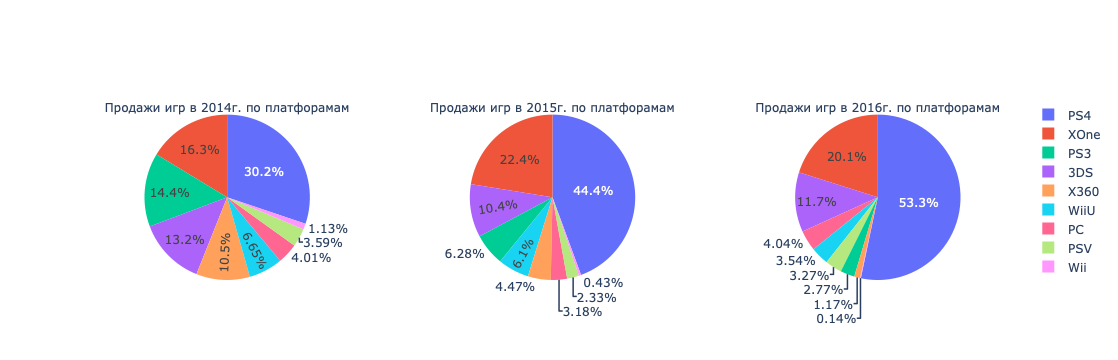

In [237]:
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=pivot_4['platform'], values=pivot_4['percent_2014'], title="Продажи игр в 2014г. по платфорамам"),
              1, 1)
fig.add_trace(go.Pie(labels=pivot_4['platform'], values=pivot_4['percent_2015'], title="Продажи игр в 2015г. по платфорамам"),
              1, 2)
fig.add_trace(go.Pie(labels=pivot_4['platform'], values=pivot_4['percent_2016'], title="Продажи игр в 2016г. по платфорамам"),
              1, 3)
fig.show()

Несмотря на уменьшение общего количества продаж игр, процент продажи игр на платформе  `PS4` вырос с 30,2%  в 2014 до 53,3% в 2016 гг, а платформы `3DS`с 10,4% до 11,7%, в то время продажа игр на платформе `XOne` упала с 16,3% до 20,1%, а платформы `PS3` c 14,4% до 2,8%

### График «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

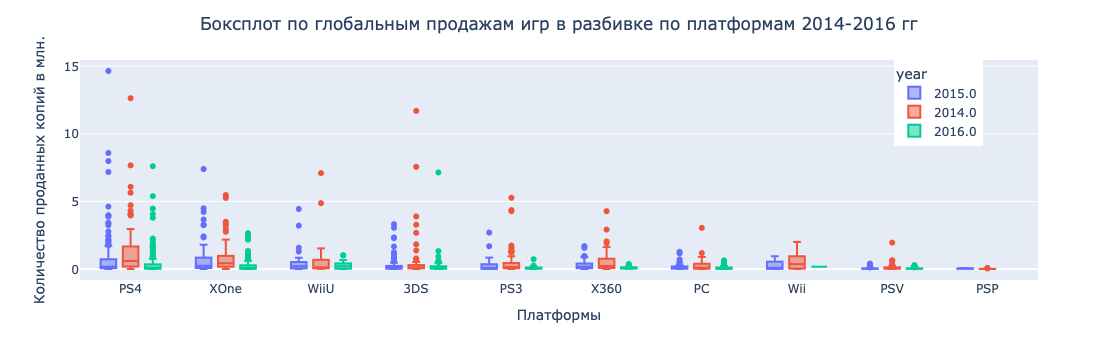

In [238]:
fig = px.box(df2, x="platform", y="total_sales", color="year")
fig.update_layout(title="Боксплот по глобальным продажам игр в разбивке по платформам 2014-2016 гг",
                  title_x = 0.5,
                  xaxis_title="Платформы",
                  yaxis_title="Количество проданных копий в млн.",
                  legend=dict(x=.85)
                  )
fig.show()

Добавим график с лимитом по вертикальной оси для отображение квартилей

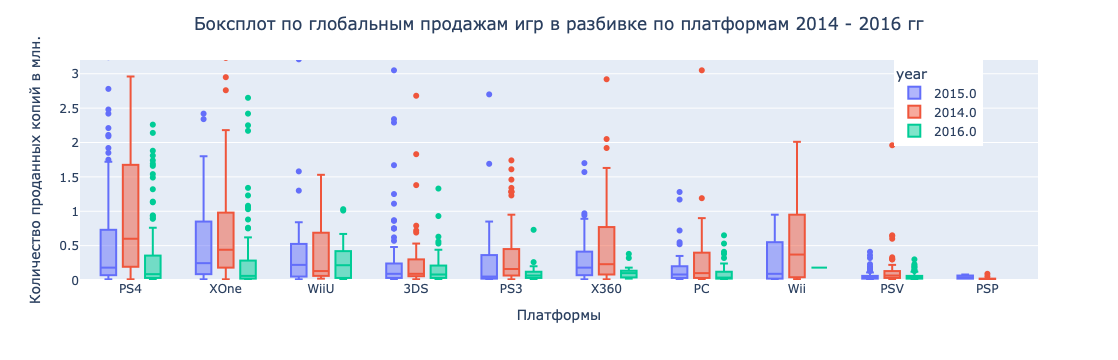

In [239]:
fig = px.box(df2, x="platform", y="total_sales", color="year")
fig.update_layout(title="Боксплот по глобальным продажам игр в разбивке по платформам 2014 - 2016 гг",
                  title_x = 0.5,
                  xaxis_title="Платформы",
                  yaxis_title="Количество проданных копий в млн.",
                  legend=dict(x=.85)
                  )
fig.update_layout(yaxis_range=[0, 3.2])
fig.show()

На графике по сравнению с 2014 г. отмечается общее число снижения продаж c 2015 с сохранением тенденции в 2016 году.

Медиана продаж на платформе `PS4` c 0.6 млн копий в 2014 г упала до 0.09 в 2016 г, XOne c 0.44млн копий до 0.06

### Корреляция между отзывами и продажами

In [240]:
df2.query('platform == "PS4"')[['total_sales','critic_score']].corr().style.background_gradient(cmap='OrRd').format('{:,.3f}').set_caption('Корреляция между продажами игр платформы PS4 и отзывами критиков')

,total_sales,critic_score
total_sales,1.000,0.403
critic_score,0.403,1.000


In [241]:
df2.query('platform != "PS4"')[['total_sales','critic_score']].corr().style.background_gradient(cmap='OrRd').format('{:,.3f}').set_caption('Корреляция между продажами игр других платформ и отзывами критиков')

,total_sales,critic_score
total_sales,1.000,0.309
critic_score,0.309,1.000


In [242]:
df2.query('platform == "PS4"')[['total_sales','user_score']].corr().style.background_gradient(cmap='OrRd').format('{:,.3f}').set_caption('Корреляция между продажами игр PS4 и отзывами пользователей')

,total_sales,user_score
total_sales,1.000,-0.040
user_score,-0.040,1.000


In [243]:
df2.query('platform != "PS4"')[['total_sales','user_score']].corr().style.background_gradient(cmap='OrRd').format('{:,.3f}').set_caption('Корреляция между продажами игр других платформ и отзывами пользователей')

,total_sales,user_score
total_sales,1.000,-0.023
user_score,-0.023,1.000


In [244]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689 entries, 0 to 1688
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             1689 non-null   object        
 1   platform         1689 non-null   object        
 2   year_of_release  1689 non-null   datetime64[ns]
 3   genre            1689 non-null   object        
 4   na_sales         1689 non-null   float64       
 5   eu_sales         1689 non-null   float64       
 6   jp_sales         1689 non-null   float64       
 7   other_sales      1689 non-null   float64       
 8   critic_score     718 non-null    float64       
 9   user_score       888 non-null    object        
 10  rating           940 non-null    object        
 11  year             1689 non-null   float64       
 12  total_sales      1689 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(5)
memory usage: 171.7+ KB


In [245]:
df2["user_score"] = df2["user_score"].astype(float)

In [246]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689 entries, 0 to 1688
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             1689 non-null   object        
 1   platform         1689 non-null   object        
 2   year_of_release  1689 non-null   datetime64[ns]
 3   genre            1689 non-null   object        
 4   na_sales         1689 non-null   float64       
 5   eu_sales         1689 non-null   float64       
 6   jp_sales         1689 non-null   float64       
 7   other_sales      1689 non-null   float64       
 8   critic_score     718 non-null    float64       
 9   user_score       888 non-null    float64       
 10  rating           940 non-null    object        
 11  year             1689 non-null   float64       
 12  total_sales      1689 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(4)
memory usage: 171.7+ KB


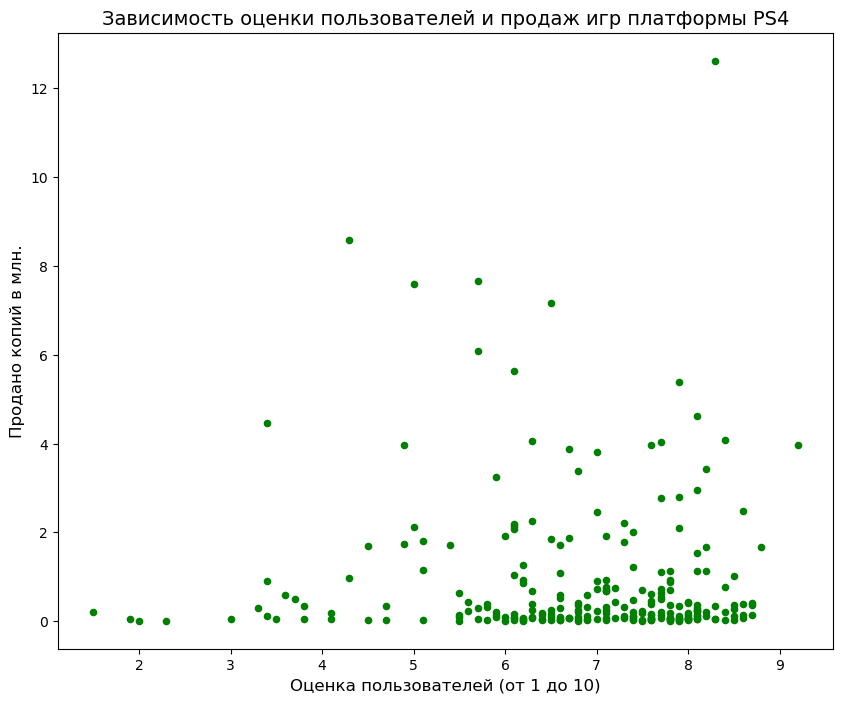

In [247]:
df2.query('platform == "PS4"').plot(kind = 'scatter', x='user_score', y='total_sales', c='green', grid=False, figsize=(10, 8))
plt.title('Зависимость оценки пользователей и продаж игр платформы PS4', fontsize=14)
plt.xlabel('Оценка пользователей (от 1 до 10)', fontsize=12)
plt.ylabel('Продано копий в млн.', fontsize=12);

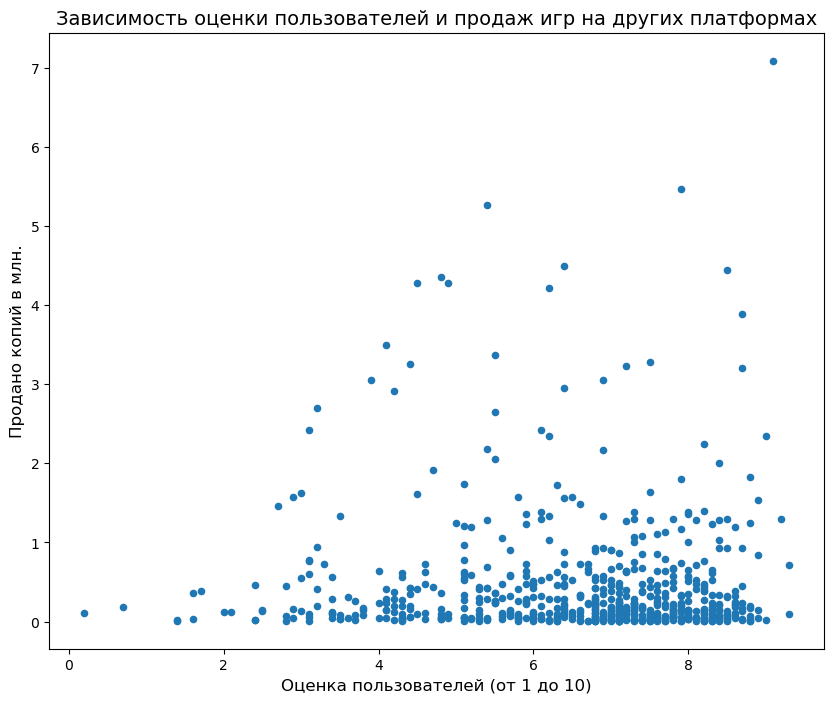

In [248]:
df2.query('platform != "PS4"').plot(kind = 'scatter', x='user_score', y='total_sales', grid=False, figsize=(10, 8))
plt.title('Зависимость оценки пользователей и продаж игр на других платформах', fontsize=14)
plt.xlabel('Оценка пользователей (от 1 до 10)', fontsize=12)
plt.ylabel('Продано копий в млн.', fontsize=12);

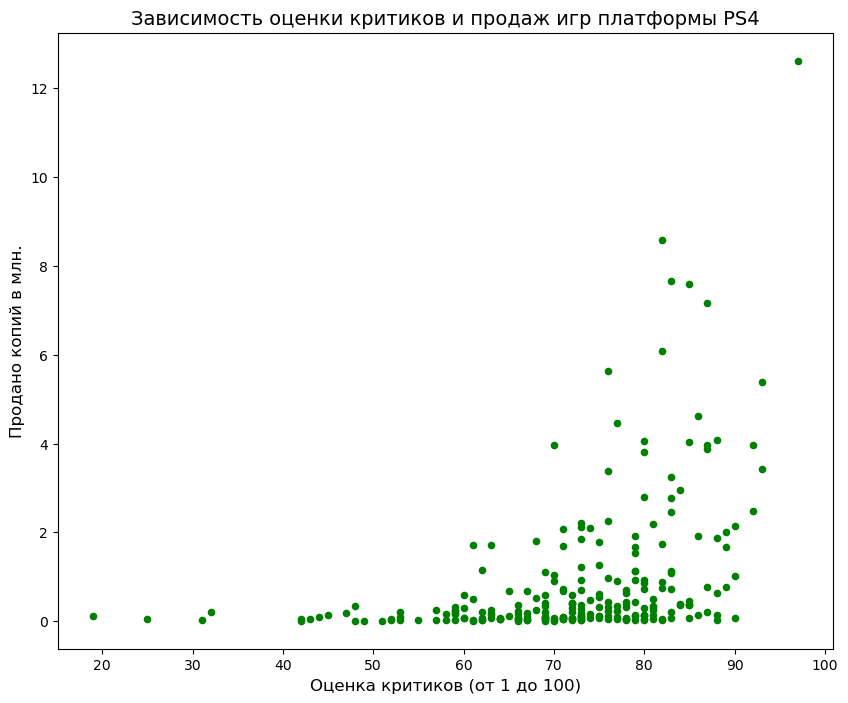

In [249]:
df2.query('platform == "PS4"').plot(kind = 'scatter', x='critic_score', y='total_sales', c='green', grid=False, figsize=(10, 8))
plt.title('Зависимость оценки критиков и продаж игр платформы PS4', fontsize=14)
plt.xlabel('Оценка критиков (от 1 до 100)', fontsize=12)
plt.ylabel('Продано копий в млн.', fontsize=12);

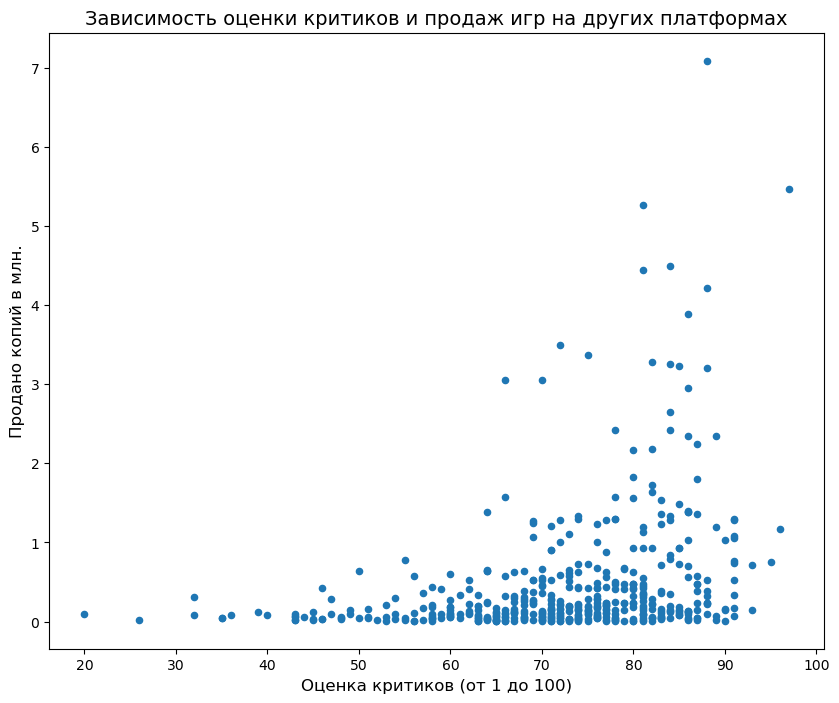

In [250]:
df2.query('platform != "PS4"').plot(kind = 'scatter', x='critic_score', y='total_sales', grid=False, figsize=(10, 8))
plt.title('Зависимость оценки критиков и продаж игр на других платформах', fontsize=14)
plt.xlabel('Оценка критиков (от 1 до 100)', fontsize=12)
plt.ylabel('Продано копий в млн.', fontsize=12);

Выше выведены графики зависимости продаж игр платформы **PS4** от оценки пользователей и оценки критиков и графики зависимости продаж других платформ от оценки пользователей и оценки критиков.

Отмечается следующее:
- продажа игр вне зависимости от платформ не зависит от оценки пользователей. Коэффициент корреляции r равен **-0.04** для PS4 и **-0.023** для остальных платформ
- отмечается положительная слабая прямая зависимость продажи игр от оценки критиков. Коэфициент корреляции для платформы PS4 **0.4**, для остальных платформ **0.3**


### Распределение игр по жанрам

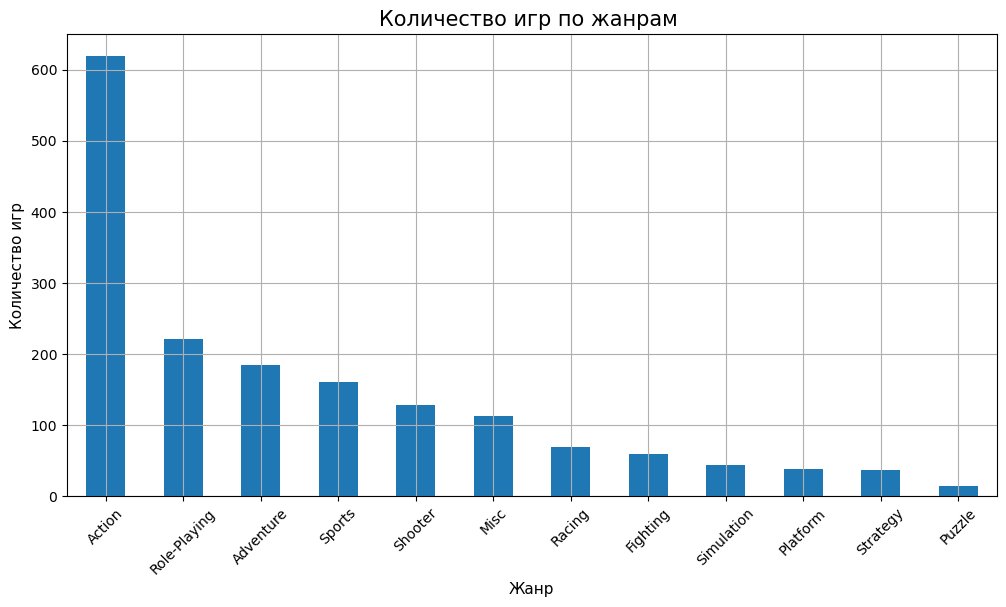

In [251]:
df2.groupby('genre')['name'].count().sort_values(ascending=False).plot(kind='bar', x='genre', grid=True, figsize=(12, 6))
plt.title('Количество игр по жанрам ', fontsize=15)
plt.xlabel('Жанр', fontsize=11)
plt.xticks(rotation=45)
plt.ylabel('Количество игр', fontsize=11);

На графике показано распредение игр по жанрам в абсолютных числах. Наибольшее количество игра в жанре `Action`. Далее с весомым отрывом идут все остальные.

Посмотрим, как данные жанры ведут себя в продажах

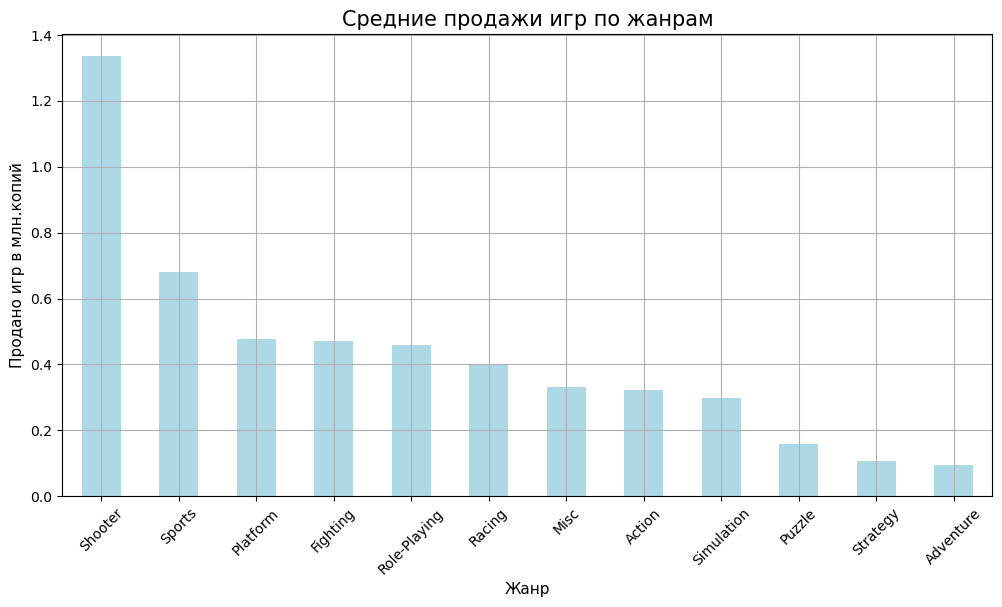

In [252]:
df2.groupby('genre')['total_sales'].mean().sort_values(ascending=False).plot(kind='bar', x='genre', color='lightblue', grid=True, figsize=(12, 6))
plt.title('Cредние продажи игр по жанрам', fontsize=15)
plt.xlabel('Жанр', fontsize=11)
plt.xticks(rotation=45)
plt.ylabel('Продано игр в млн.копий', fontsize=11);

На графике выше выведена **средняя** продажи игр каждого жанра. Наибольшие продажи у игр жанра `Shooter`

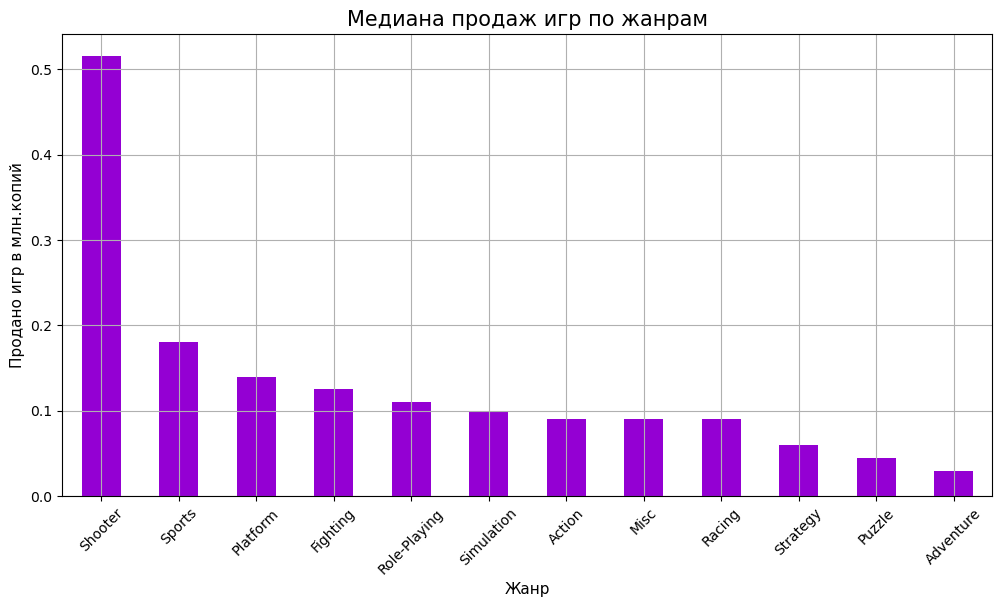

In [253]:
df2.groupby('genre')['total_sales'].median().sort_values(ascending=False).plot(kind='bar', x='genre', color='darkviolet', grid=True, figsize=(12, 6))
plt.title('Медиана продаж игр по жанрам', fontsize=15)
plt.xlabel('Жанр', fontsize=11)
plt.xticks(rotation=45)
plt.ylabel('Продано игр в млн.копий', fontsize=11);

На графике выше представлена **медиана** продаж игр по жанрам. Так же как и в случае со средней, наибольшие продажи у игр жанра `Shooter`

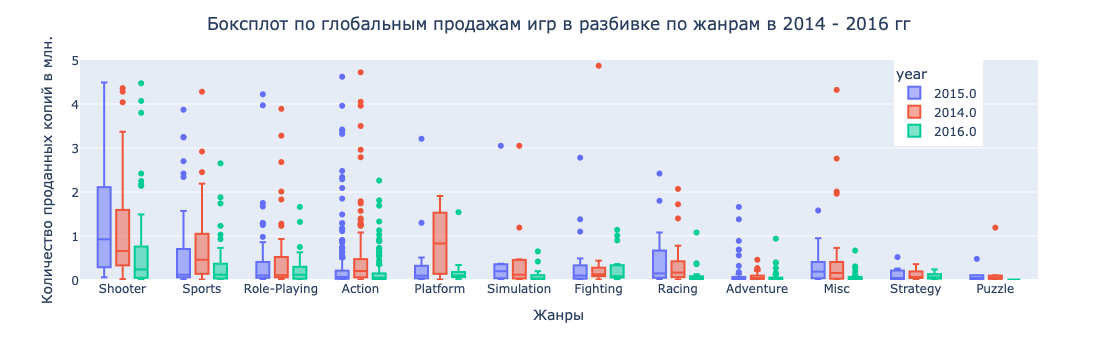

In [254]:
fig = px.box(df2, x="genre", y="total_sales", color="year")
fig.update_layout(title="Боксплот по глобальным продажам игр в разбивке по жанрам в 2014 - 2016 гг",
                  title_x = 0.5,
                  xaxis_title="Жанры",
                  yaxis_title="Количество проданных копий в млн.",
                  legend=dict(x=.85)
                  )
fig.update_layout(yaxis_range=[0, 5])
fig.show()

In [255]:
df2.groupby(['genre'])['total_sales'].median().sort_values(ascending=False)

genre
Shooter         0.515
Sports          0.180
Platform        0.140
Fighting        0.125
Role-Playing    0.110
Simulation      0.100
Action          0.090
Misc            0.090
Racing          0.090
Strategy        0.060
Puzzle          0.045
Adventure       0.030
Name: total_sales, dtype: float64

Выведены медианы продаж игр по жанрам

In [256]:
df2.groupby(['genre', 'year'])['total_sales'].median()

genre         year  
Action        2014.0    0.205
              2015.0    0.070
              2016.0    0.050
Adventure     2014.0    0.040
              2015.0    0.030
              2016.0    0.020
Fighting      2014.0    0.130
              2015.0    0.100
              2016.0    0.085
Misc          2014.0    0.160
              2015.0    0.190
              2016.0    0.040
Platform      2014.0    0.830
              2015.0    0.100
              2016.0    0.100
Puzzle        2014.0    0.050
              2015.0    0.045
              2016.0    0.010
Racing        2014.0    0.170
              2015.0    0.150
              2016.0    0.050
Role-Playing  2014.0    0.110
              2015.0    0.105
              2016.0    0.120
Shooter       2014.0    0.660
              2015.0    0.925
              2016.0    0.240
Simulation    2014.0    0.120
              2015.0    0.200
              2016.0    0.025
Sports        2014.0    0.460
              2015.0    0.120
              2016.

Выше выведены медианы продаж игр по каждому жанру в разбивке по годам

- Следует отметить, что продажи постепенно падают год от года. 
- Наиболее прибыльными жанрами остаются `Shooter` **0.52** млн проданных копий, `Sports` **0.18**, `Platform` **0.14**.
- Наименее прибыльные жанры - `Puzzle` **0.045** млн проданных копий и `Adventure` **0.03**


**Заключение по разделу**
При анализе игр по годам выявлено резкий рост выпуска новых игр с 2002 года с ежегодным ростом до 2008 года, где был максимум (1426 игр). Затем отмечается уменьшение до 606 игр в 2015 и 502 игр в 2016 годах. Актуальным перодом выбрали данные с 2014 по 2016 года, и в дальнейшем использовали только их.
В топе платформ отмечается `PS4`, `XOne`, `3DS`. По сравнению с 2014 годом в 2015 году отмечаетя увеличение продаж игра на платформах `PS4` и `XOne`, но в 2016 отмечается снижение продаж в абсолютных числах по каждой платформе
При оценке жанров игр наиболее прибыльные жанры это `Shooter`, `Sports`, `Platform` а наименее прибыльные - `Puzzle` и `Adventure`


## Портрет пользователя каждого региона

### Самые популярные платформы

In [257]:
df2.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc=['sum']).style.background_gradient(cmap='Blues', axis=0).format('{:,.2f}').set_caption('Число проданных копий в каждом регионе по платфорам ')


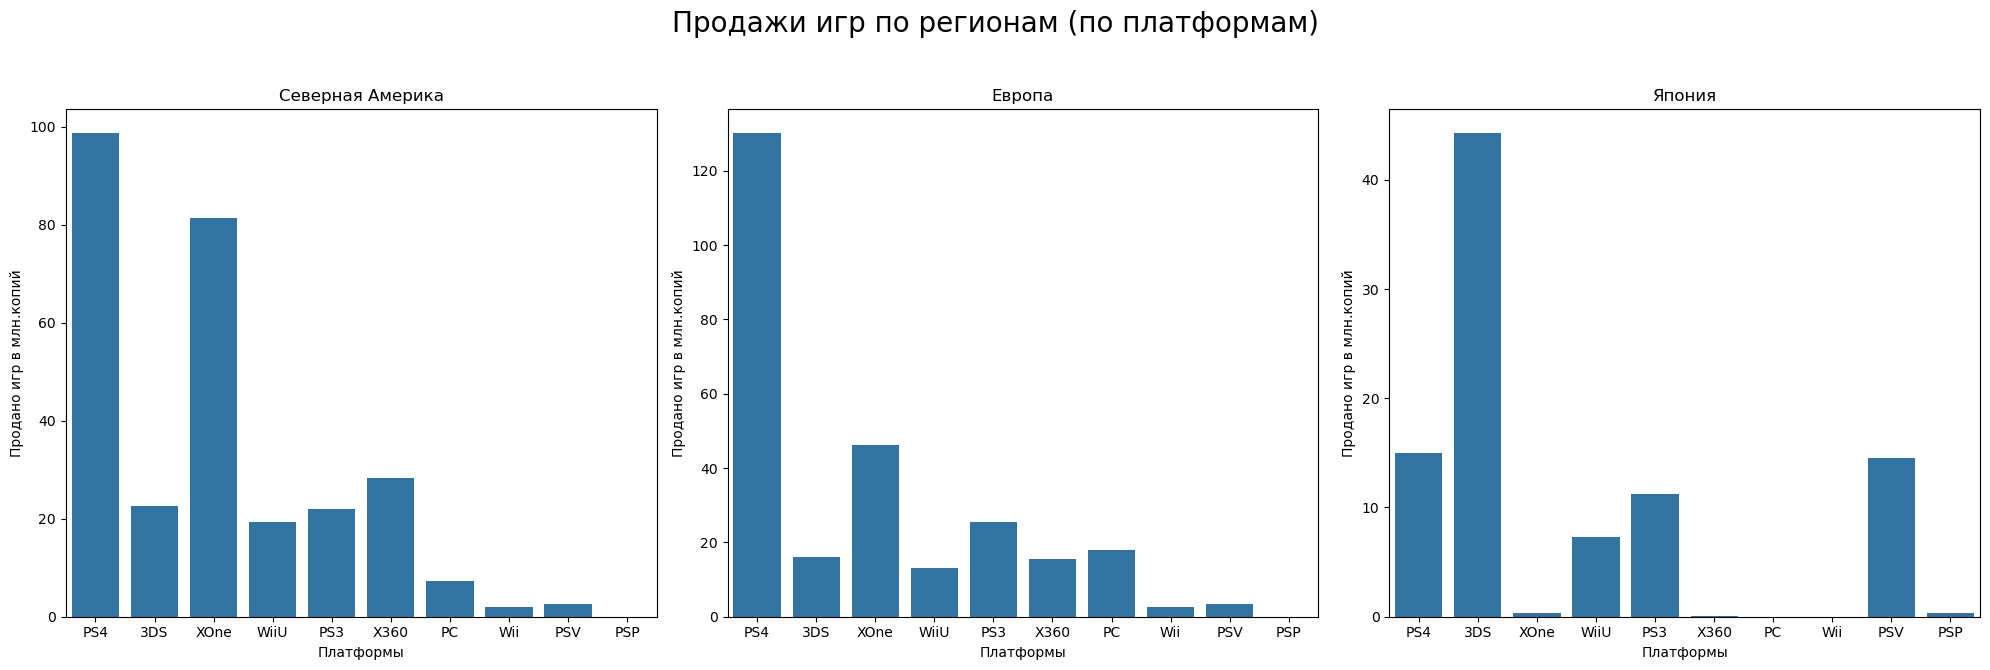

In [258]:
values = ['na_sales', 'eu_sales', 'jp_sales']
number_row = int(len(values)/3)

fig, ax = plt.subplots(nrows = number_row, ncols=3, figsize=(20, 7))
fig.suptitle('Продажи игр по регионам (по платформам)', fontsize=20)

for i in range(len(values)):
    df2_sorted = df2.sort_values(by=values[i], ascending=False)
    sns.barplot(data = df2_sorted, x='platform', y = df2[values[i]], estimator=sum, ax=ax[i], ci=None)
    ax[i].set_xlabel('Платформы')
    ax[i].set_ylabel('Продано игр в млн.копий')
ax[0].set_title('Северная Америка')
ax[1].set_title('Европа')
ax[2].set_title('Япония')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.show()

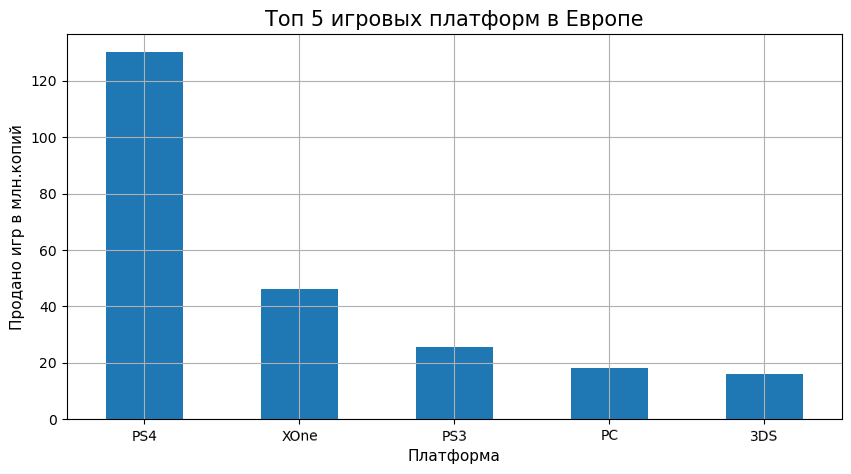

In [259]:
df2.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar', x='platform', grid=True, figsize=(10, 5))
plt.title('Топ 5 игровых платформ в Европе', fontsize=15)
plt.xlabel('Платформа', fontsize=11)
plt.xticks(rotation=1)
plt.ylabel('Продано игр в млн.копий', fontsize=11);

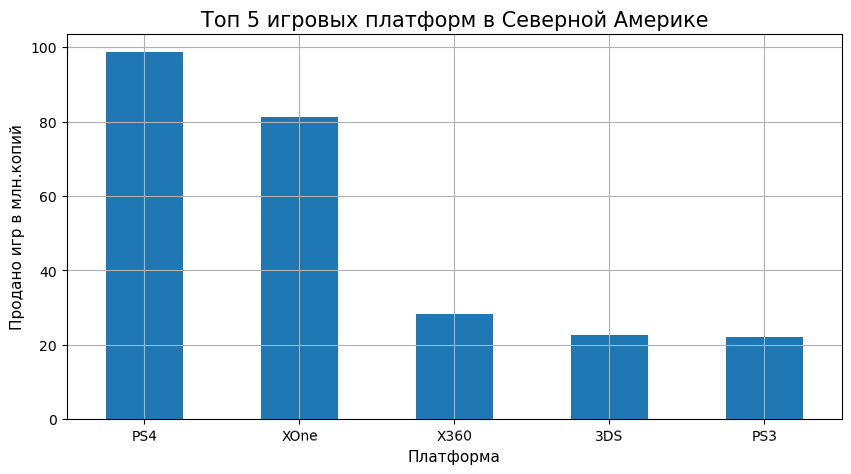

In [260]:
df2.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar', x='platform', grid=True, figsize=(10, 5))
plt.title('Топ 5 игровых платформ в Северной Америке', fontsize=15)
plt.xlabel('Платформа', fontsize=11)
plt.xticks(rotation=1)
plt.ylabel('Продано игр в млн.копий', fontsize=11);

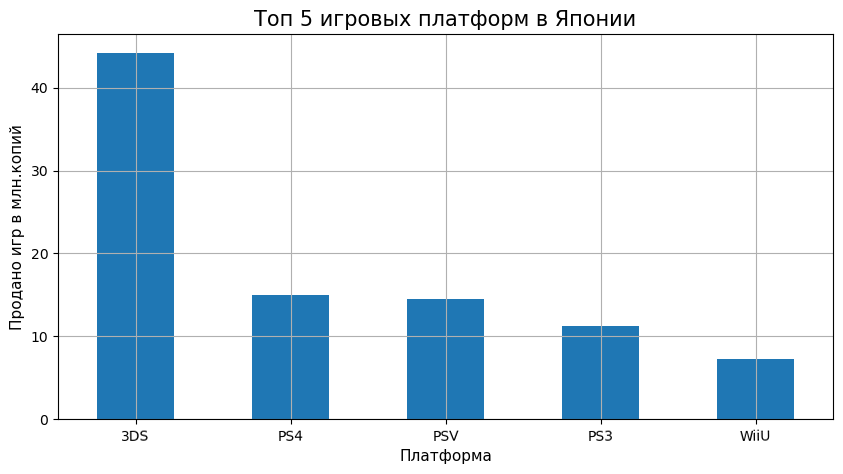

In [261]:
df2.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar', x='platform', grid=True, figsize=(10, 5))
plt.title('Топ 5 игровых платформ в Японии', fontsize=15)
plt.xlabel('Платформа', fontsize=11)
plt.xticks(rotation=1)
plt.ylabel('Продано игр в млн.копий', fontsize=11);

На графиках выше выведен топ платформ по продажам игр по регионам.
- В Европе в топе 5 платформ: PS4, XOne, PC, 3DS, PS3, среди которых лиером продаж является PS4
- В Северной Америке: PS4, XOne, 3DS, WiiU, X360, среди которых либером продаж является так же PS4
- В Японии: 3DS, PS4, PSV, PS3, WiiU, среди которых лидером продаж является платформа 3DS

### Самые популярные жанры

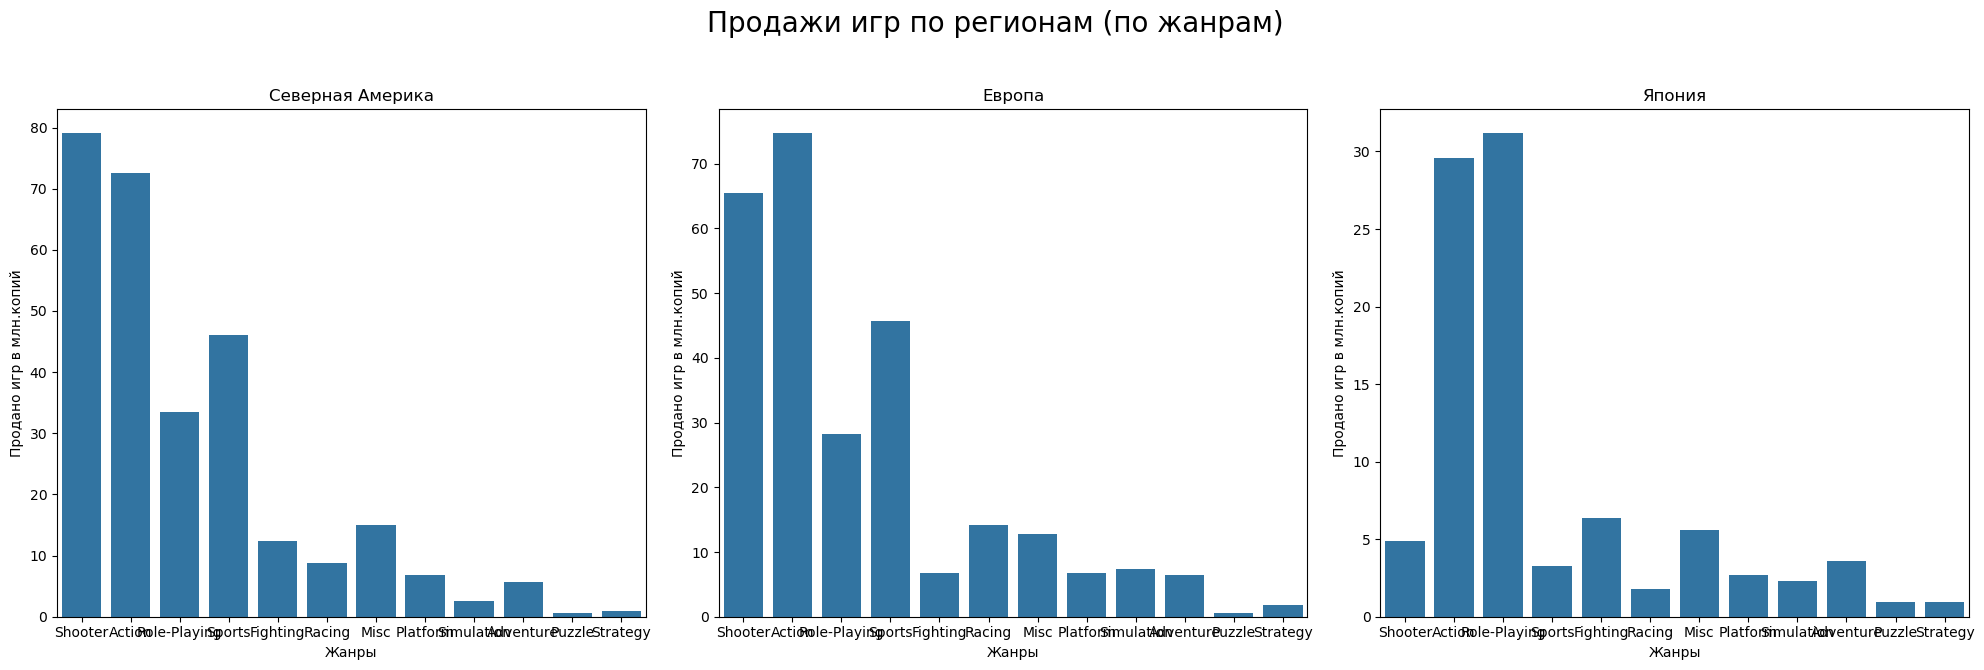

In [262]:
values = ['na_sales', 'eu_sales', 'jp_sales']
number_row = int(len(values)/3)

fig, ax = plt.subplots(nrows = number_row, ncols=3, figsize=(20, 7))
fig.suptitle('Продажи игр по регионам (по жанрам)', fontsize=20)

for i in range(len(values)):
    df2_sorted = df2.sort_values(by=values[i], ascending=False)
    sns.barplot(data = df2_sorted, x='genre', y = df2[values[i]], estimator=sum, ax=ax[i], ci=None)
    ax[i].set_xlabel('Жанры')
    ax[i].set_ylabel('Продано игр в млн.копий')
ax[0].set_title('Северная Америка')
ax[1].set_title('Европа')
ax[2].set_title('Япония')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.show()

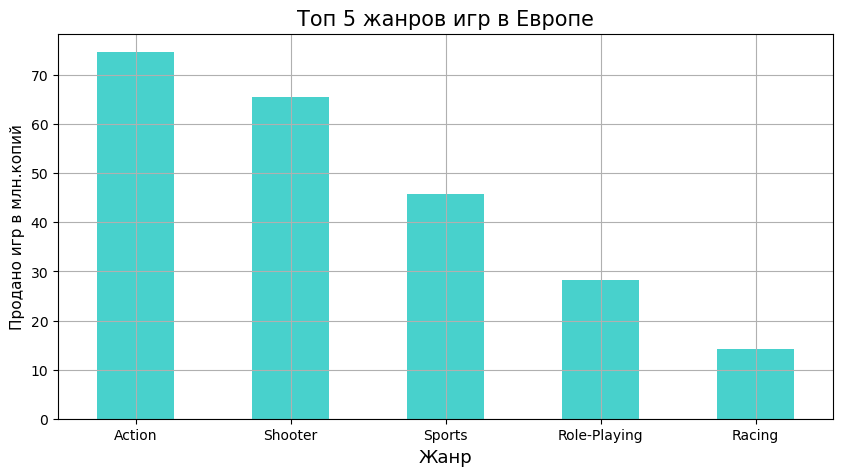

In [263]:
df2.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar', x='genre', color='mediumturquoise', grid=True, figsize=(10, 5))
plt.title('Топ 5 жанров игр в Европе', fontsize=15)
plt.xlabel('Жанр', fontsize=13)
plt.xticks(rotation=0)
plt.ylabel('Продано игр в млн.копий', fontsize=11);

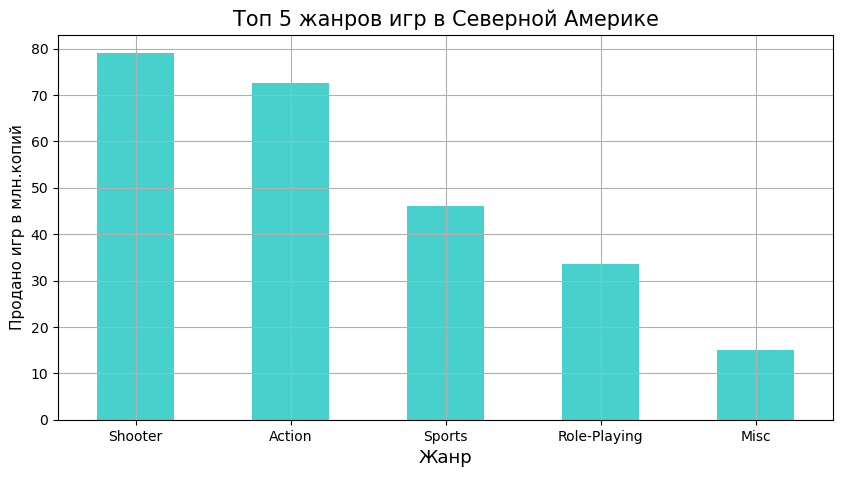

In [264]:
df2.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar', x='genre', color='mediumturquoise', grid=True, figsize=(10, 5))
plt.title('Топ 5 жанров игр в Северной Америке', fontsize=15)
plt.xlabel('Жанр', fontsize=13)
plt.xticks(rotation=0)
plt.ylabel('Продано игр в млн.копий', fontsize=11);

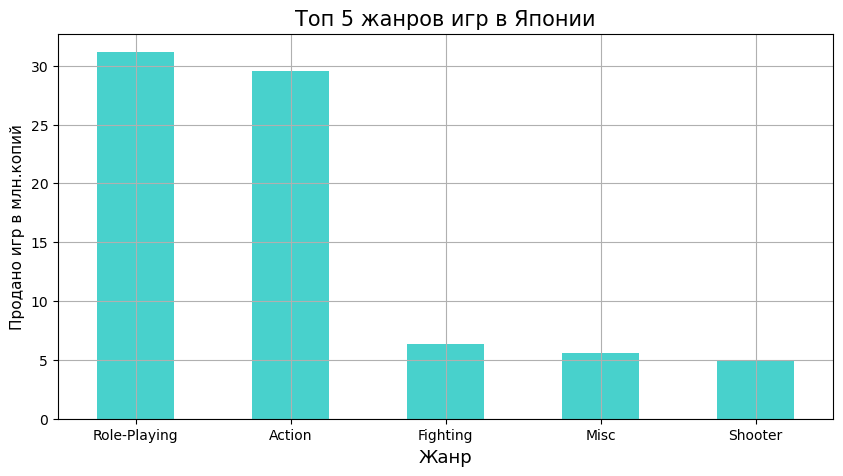

In [265]:
df2.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar', x='genre', color='mediumturquoise', grid=True, figsize=(10, 5))
plt.title('Топ 5 жанров игр в Японии', fontsize=15)
plt.xlabel('Жанр', fontsize=13)
plt.xticks(rotation=0)
plt.ylabel('Продано игр в млн.копий', fontsize=11);

На графиках выше визуализированы жанры с игр с наибольшими продажами в каждом исследуемомо регионе.
- в Северной Америке и Европе в топе жанров находятся Shooter, Action, Sports, Role_playing c отличием в том что в Европе в топ попал жанр Racing, а в Америке - Miscellaneous
- в Японии в топе жанры Action, Role-playing, Shooter, Miscellaneous и Adventure

### Рейтинг ESRB и продажи в регионах

In [266]:
df2.query('rating.notna()').pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc=['sum']).style.background_gradient(cmap='BuPu', axis=0).format('{:,.2f}').set_caption('Число проданных копий в каждом регионе по рейтингу ESCB')

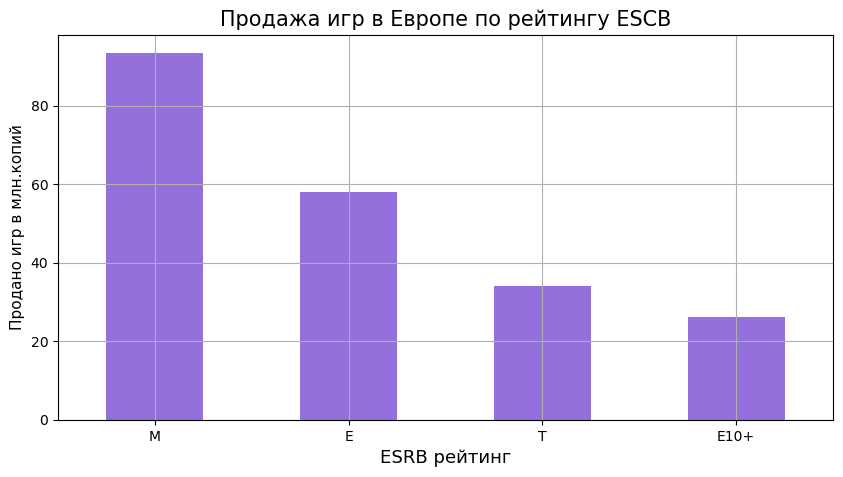

In [267]:
df2.query('rating.notna()').groupby('rating')['eu_sales'].sum().sort_values(ascending=False).plot(kind='bar', x='rating', color='mediumpurple', grid=True, figsize=(10, 5))
plt.title('Продажа игр в Европе по рейтингу ESCB', fontsize=15)
plt.xlabel('ESRB рейтинг', fontsize=13)
plt.xticks(rotation=0)
plt.ylabel('Продано игр в млн.копий', fontsize=11);

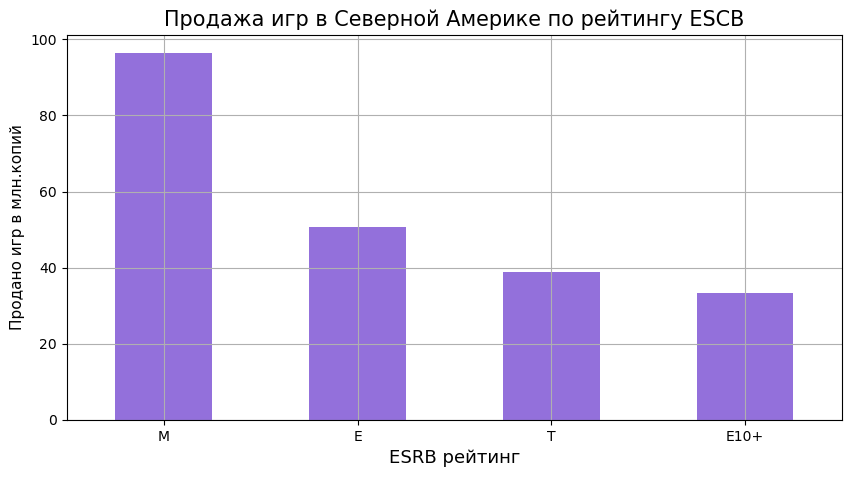

In [268]:
df2.query('rating.notna()').groupby('rating')['na_sales'].sum().sort_values(ascending=False).plot(kind='bar', x='rating', color='mediumpurple', grid=True, figsize=(10, 5))
plt.title('Продажа игр в Северной Америке по рейтингу ESCB', fontsize=15)
plt.xlabel('ESRB рейтинг', fontsize=13)
plt.xticks(rotation=0)
plt.ylabel('Продано игр в млн.копий', fontsize=11);

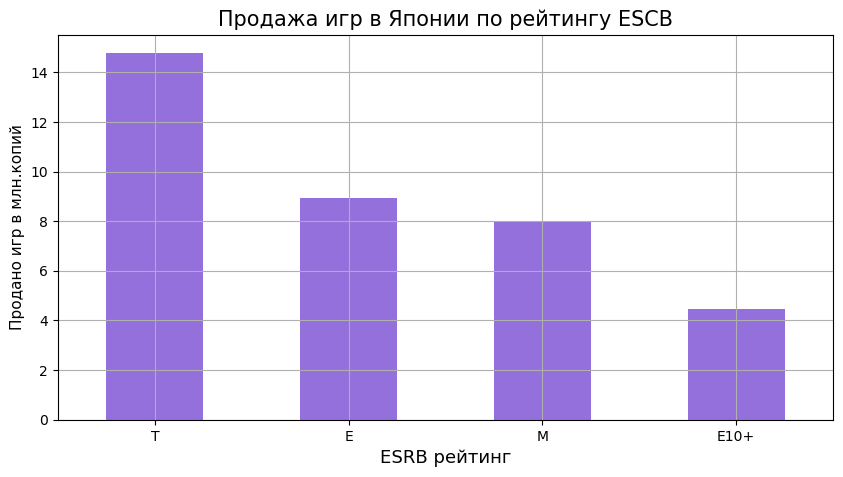

In [269]:
df2.query('rating.notna()').groupby('rating')['jp_sales'].sum().sort_values(ascending=False).plot(kind='bar', x='rating', color='mediumpurple', grid=True, figsize=(10, 5))
plt.title('Продажа игр в Японии по рейтингу ESCB', fontsize=15)
plt.xlabel('ESRB рейтинг', fontsize=13)
plt.xticks(rotation=0)
plt.ylabel('Продано игр в млн.копий', fontsize=11);

На графиках выше представлена визуализация распределения продаж игр в каждом исследуемом регионе в зависимости от рейтинга Entertainment Software Rating Board(ESCB).
- В Европе и Северной Америке наибльшие продажи у игр с рейтингом «M» («Mature»), наименьшие - с рейтингом E10+
- В Японии наибольшие продажи у игр с рейтингом «T» («Teen»), наименьшие -так же с рейтингом E10+

**Заключение по разделу:**

При оценке пользователей каждого представленного региона выявили следующее:
- В Северной Америке и Европе лидером продаж являются игры для платформы PS4, в топе жанров находятся Shooter, Action, Sports с рейтингом «M» («Mature»)
- В Японии лидером продаж являются игры платформы 3DS, в топе жанры Action, Role-playing, Shooter, с рейтингом «T» («Teen»)

## Проверка гипотез

### Одинаковы ли средние пользовательские рейтинги платформ Xbox One и PC

Имеем две независимые выборки: пользовательский рейтинг игр на Xbox One и пользовательский рейтинг игр PC

**Нулевая H0 гипотеза**: Истинное среднее рейтинга игр на Xbox One `равно` истинной средней рейтинга игр на PC

**Альтернативная H1 гипотеза**: Истинное среднее рейтинга игр на Xbox One `НЕ равно (больше или меньше)` истинной средней рейтинга игр на PС. Гипотеза является двусторонней.

In [270]:
df2

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,total_sales
0,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,2015.0,14.63
1,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,2014.0,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014-01-01,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,2014.0,11.68
3,FIFA 16,PS4,2015-01-01,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,2015.0,8.58
4,Star Wars Battlefront (2015),PS4,2015-01-01,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,2015.0,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684,Strawberry Nauts,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,2016.0,0.01
1685,Aiyoku no Eustia,PSV,2014-01-01,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,2014.0,0.01
1686,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,2016.0,0.01
1687,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,2016.0,0.01


In [271]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689 entries, 0 to 1688
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             1689 non-null   object        
 1   platform         1689 non-null   object        
 2   year_of_release  1689 non-null   datetime64[ns]
 3   genre            1689 non-null   object        
 4   na_sales         1689 non-null   float64       
 5   eu_sales         1689 non-null   float64       
 6   jp_sales         1689 non-null   float64       
 7   other_sales      1689 non-null   float64       
 8   critic_score     718 non-null    float64       
 9   user_score       888 non-null    float64       
 10  rating           940 non-null    object        
 11  year             1689 non-null   float64       
 12  total_sales      1689 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(4)
memory usage: 171.7+ KB


In [272]:
sample1 = df2.query('platform == "XOne" and user_score.notna()')['user_score']
sample1 = sample1.astype(float)


In [273]:
sample2 = df2.query('platform == "PC" and user_score.notna()')['user_score']
sample2 = sample2.astype(float)

In [274]:
alpha = 0.05

In [275]:
len(sample1)

165

In [276]:
len(sample2)

122

В связи с тем что выборки разного размера (165 и 122), то в тесте укажем параметр `equal_var`=False

In [277]:
results = st.ttest_ind(sample1, sample2, equal_var=False)

In [278]:
print(f'Среднее рейтинга игр на Xbox One : {round(np.mean(sample1),3)}')
print(f'Среднее рейтинга игр на PC: {round(np.mean(sample2),3)}')
print('p-значение:', round(results.pvalue, 3))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее рейтинга игр на Xbox One : 6.595
Среднее рейтинга игр на PC: 6.298
p-значение: 0.116
Не получилось отвергнуть нулевую гипотезу


**Вывод:** На основе проведенного t-теста двух независимых выборок нулевая гипотеза не может быть отвергнута при уровне статистической значимости 1% и 5%.  Это значит что среднеее среднее рейтинга игр на Xbox One равно истинной средней рейтинга игр на PC

Вероятность случайно получить такое или большее различие равна почти 11.6 %, хотя средние рейтинга игр и не одинаковы. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между пользовательскими рейтингами игр этих двух исследуемых платформ


### Отличаются ли средние пользовательские рейтинги жанров Action  и Sports

Имеем две независимые выборки: пользовательский рейтинг игр жанра Action и пользовательский рейтинг игр жанра Sports

**Нулевая H0 гипотеза**: Истинное среднее рейтинга игр жанра Action `равно` истинной средней рейтинга игр жанра Sports

**Альтернативная H1 гипотеза**: Истинное среднее рейтинга игр жанра Action `НЕ равно (больше или меньше)` истинной средней рейтинга игр жанра Sports. Гипотеза является двусторонней.

In [279]:
sample_1 = df2.query('genre == "Action" and user_score.notna()')['user_score']
sample_1 = sample_1.astype(float)
len(sample_1)

297

In [280]:
sample_2 = df2.query('genre == "Sports" and user_score.notna()')['user_score']
sample_2 = sample_2.astype(float)
len(sample_2)

127

В связи с тем что выборки разного размера (297 и 127), то в тесте укажем параметр `equal_var`=False

In [281]:
alpha = 0.05

In [282]:
results = st.ttest_ind(sample_1, sample_2, equal_var=False)

In [283]:
print(f'Среднее рейтинга игр жанра Action : {round(np.mean(sample_1),3)}')
print(f'Среднее рейтинга игр жанра Sports: {round(np.mean(sample_2),3)}')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее рейтинга игр жанра Action : 6.761
Среднее рейтинга игр жанра Sports: 5.225
p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


**Вывод:** На основе проведенного t-теста двух независимых выборок нулевая гипотеза отвергнута при уровне статистической значимости 5% (так же как и при 1%). Это значит что среднеее значение пользовательского рейтинга игр жанра Action не равно истинной средней рейтинга игр жанра Sports.

**Заключение по разделу:**

Проведено два статистических теста. 
Нулевая гипотеза о том что средние пользователские рейтинги игр на Xbox One и рейтинги на игр на PC равны, не может быть отвергнута. А вот нулевая гипотезе о равенстве среднего пользовательского рейтинга игр жанра Action и жанра Sports - отвергнута

## Выводы

В данной работе проведён анализ данных интернет-магазина «Стримчик».

- На этапе предобработки выявлено, что датасет имеет 11 колонок и 16715 строк и охватывает период с 1980 по 2016 год. Названия столбцов приведены к нижнему регистру. В категориальных и количественных переменных дубикатов не выявлено. Несколько строк с пропусками названий игр и жанров удалены. Выявлены так же пропуски в столбцах: `name`, `year_of_release`, `genre`, `critic_score`, `user_score`, `rating`. Пропуски заполнению численным (средним, медианой и т.д.) значением не подлежат, поэтому оставили пропущенные значения. Столбец с годом выпуска переведен в формат `datetime`. Создан отдельный столбец `year` с годом и столбец `total_sales` с суммарной продажей каждой игры.
- При исследовательском анализе игр по годам выявлено резкий рост выпуска новых игр с 2002 года с ежегодным ростом до 2008 года, где был максимум (1426 игр). Затем отмечается уменьшение до 606 игр в 2015 и 502 игр в 2016 годах. Актуальным перодом выбрали данные с 2014 по 2016 года, и в дальнейшем использовали только их.В топе платформ отмечается `PS4`, `XOne`, `3DS`. По сравнению с 2014 годом в 2015 году отмечаетя увеличение продаж игра на платформах `PS4` и `XOne`, но в 2016 отмечается снижение продаж в абсолютных числах по каждой платформе. При оценке жанров игр наиболее прибыльные жанры это `Shooter`, `Sports`, `Platform` а наименее прибыльные - `Puzzle` и `Adventure`.
- При оценке пользователей каждого представленного региона выявили следующее: В Северной Америке и Европе лидером продаж являются игры для платформы PS4, в топе жанров находятся Shooter, Action, Sports с рейтингом «M» («Mature»). В Японии лидером продаж являются игры платформы 3DS, в топе жанры Action, Role-playing, Shooter, с рейтингом «T» («Teen»)
- В работе проведено два статистических теста. Нулевая гипотеза о том что средние пользователские рейтинги игр на Xbox One и рейтинги на игр на PC равны, не может быть отвергнута. А вот нулевая гипотезе о равенстве среднего пользовательского рейтинга игр жанра Action и жанра Sports - отвергнута

## Рекомендации

Наиболее успешны игры на платформах PS4 и XOne. Если сомотреть на жанры - то это `Shooter`, `Sports`, `Platform`. Желательно чтобы были высокие отзывы критиков, а вот на отзывы пользователей обращать внимания не следует. Поэтому для повышения продаж следует сделать упор на игры этих платформ и жанров и планировать рекламную компанию именно этих игр.